#                                                           Multilingual Mobile App Reviews Dataset Analysis

In [290]:
import pandas as pd
import seaborn as sns
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer

# column description

review_id → Unique identifier for each review.

user_id → Unique identifier for the user who wrote the review.

app_name → Name of the mobile application being reviewed.

app_category → Category/genre of the app (e.g., Games, Finance, Health).

review_text → Written text of the user’s review.

review_language → Language in which the review is written.

rating → Star rating or numeric score given by the user.

review_date → Date when the review was submitted.

verified_purchase → Whether the review is from a verified purchase (Yes/No).

device_type → Type of device used (e.g., Android, iOS, Tablet).

num_helpful_votes → Number of people who found the review helpful.

user_age → Age of the user writing the review.

user_country → Country of the user.

user_gender → Gender of the user.

app_version → Version of the app being reviewed.

In [291]:
df = pd.read_csv("multilingual_mobile_app_reviews_2025.csv")
df

,review_id,user_id,app_name,app_category,review_text,review_language,rating,review_date,verified_purchase,device_type,num_helpful_votes,user_age,user_country,user_gender,app_version
0,1,1967825,MX Player,Travel & Local,Qui doloribus consequuntur. Perspiciatis tempo...,no,1.3,2024-10-09 19:26:40,True,Android Tablet,65,14.0,China,Female,1.4
1,2,9242600,Tinder,Navigation,"Great app but too many ads, consider premium v...",ru,1.6,2024-06-21 17:29:40,True,iPad,209,18.0,Germany,Male,8.9
2,3,7636477,Netflix,Dating,The interface could be better but overall good...,es,3.6,2024-10-31 13:47:12,True,iPad,163,67.0,Nigeria,Male,2.8.37.5926
3,4,209031,Venmo,Productivity,"Latest update broke some features, please fix ...",vi,3.8,2025-03-12 06:16:22,True,iOS,664,66.0,India,Female,10.2
4,5,7190293,Google Drive,Education,"Perfect for daily use, highly recommend to eve...",tl,3.2,2024-04-21 03:48:27,True,iPad,1197,40.0,South Korea,Prefer not to say,4.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2509,2510,2322118,OneDrive,Business,Счастье низкий пастух. Нож неожиданно поезд тр...,nl,3.0,2023-11-23 01:07:30,False,iOS,635,21.0,Malaysia,Non-binary,1.1.2-beta
2510,2511,2167693,Signal,Finance,This app is amazing! Really love the new featu...,ms,1.9,2025-06-05 16:42:20,True,Windows Phone,1127,38.0,Bangladesh,NaN,v12.0.80
2511,2512,5554467,OneDrive,Social Networking,This app is amazing! Really love the new featu...,zh,3.4,2024-06-15 05:02:18,True,Android Tablet,677,27.0,Pakistan,NaN,9.1.32.4821
2512,2513,8805125,Coursera,Social Networking,Invitare convincere pericoloso corsa fortuna. ...,da,2.7,2023-12-02 01:41:31,True,Android,155,35.0,India,NaN,v8.9.13


In [292]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2514 entries, 0 to 2513
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   review_id          2514 non-null   int64  
 1   user_id            2514 non-null   int64  
 2   app_name           2514 non-null   object 
 3   app_category       2514 non-null   object 
 4   review_text        2455 non-null   object 
 5   review_language    2514 non-null   object 
 6   rating             2477 non-null   float64
 7   review_date        2514 non-null   object 
 8   verified_purchase  2514 non-null   bool   
 9   device_type        2514 non-null   object 
 10  num_helpful_votes  2514 non-null   int64  
 11  user_age           2514 non-null   float64
 12  user_country       2473 non-null   object 
 13  user_gender        1927 non-null   object 
 14  app_version        2484 non-null   object 
dtypes: bool(1), float64(2), int64(3), object(9)
memory usage: 277.6+ KB


In [293]:
df['review_text'] = df['review_text'].fillna("NA")

In [294]:
# sns.boxplot(df['rating'])
# No outliers - replacing with mean

In [295]:
df['rating'] =df['rating'].fillna(df['rating'].mean())

In [296]:
df = df.drop("user_country",axis=1)

In [297]:
df = df.drop("user_gender",axis=1)

In [298]:
for c in df.columns:
    if df[c].isnull().any():
        print(c)

app_version


In [299]:
df['app_version'] = df['app_version'].fillna("NA")

# make observation

1. Which factors do you think most strongly influence the rating of an app? Why?

<Axes: >

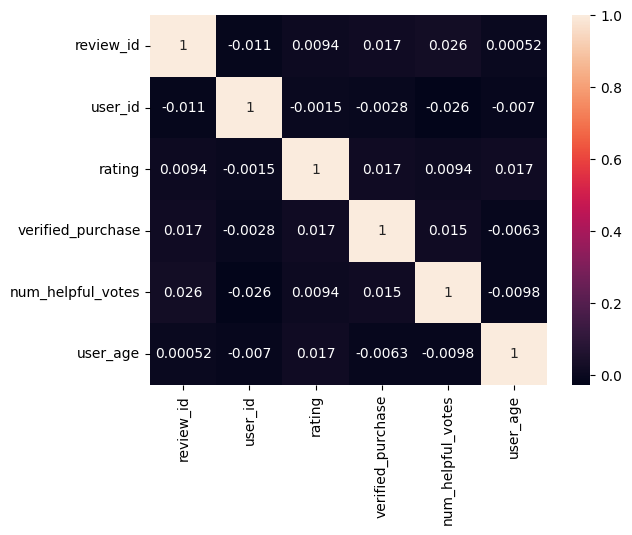

In [300]:
num_corr = df.corr(numeric_only=True)
sns.heatmap(num_corr,annot=True)

Observation - user_age and verified_purchase are the features strongly influencing rating (1.7%)

2. How might review_language affect the interpretation of user satisfaction?

In [301]:
df.groupby('review_language')['rating'].count()

review_language
ar    108
da    105
de    102
en     99
es    119
fi    111
fr     90
hi     92
id    111
it    100
ja     94
ko    114
ms     88
nl    116
no    103
pl    122
pt     93
ru    134
sv    102
th     97
tl    114
tr    102
vi    100
zh     98
Name: rating, dtype: int64

Observation - More users prefer giving rating in ru - Russian

3. Explain how app_version and review_date together can show app improvement or decline.

In [302]:
pd.melt(df,id_vars=['app_version',"review_date"],value_vars="rating")

,app_version,review_date,variable,value
0,1.4,2024-10-09 19:26:40,rating,1.3
1,8.9,2024-06-21 17:29:40,rating,1.6
2,2.8.37.5926,2024-10-31 13:47:12,rating,3.6
3,10.2,2025-03-12 06:16:22,rating,3.8
4,4.7,2024-04-21 03:48:27,rating,3.2
...,...,...,...,...
2509,1.1.2-beta,2023-11-23 01:07:30,rating,3.0
2510,v12.0.80,2025-06-05 16:42:20,rating,1.9
2511,9.1.32.4821,2024-06-15 05:02:18,rating,3.4
2512,v8.9.13,2023-12-02 01:41:31,rating,2.7


Observation - Newer versions and latest reviews combine together are generating better ratings

4. Do you think verified_purchase makes reviews more trustworthy? Justify your answer.

In [303]:
df['verified_purchase'].value_counts()

verified_purchase
True     1939
False     575
Name: count, dtype: int64

Observation - Yes verified purchases makes for more trustworthy review as purchase enables completeaccess of the platform. According to the data there are more number of users who have purchased viewership (1939) than viewers who have not purchased viewership (575) 

5. How would you test whether device_type has an impact on app ratings?

In [304]:
df.groupby("device_type")['rating'].max()

device_type
Android           5.0
Android Tablet    5.0
Windows Phone     5.0
iOS               5.0
iPad              5.0
Name: rating, dtype: float64

Observation - Maximum Rating across all device is 5

6. If you had to find which age group is most satisfied, what steps would you follow?

In [305]:
df.groupby("user_age")['rating'].mean()

user_age
13.0    2.823810
14.0    2.711429
15.0    3.038235
16.0    3.194736
17.0    3.294737
          ...   
71.0    2.858974
72.0    3.194118
73.0    3.200390
74.0    3.177778
75.0    3.030722
Name: rating, Length: 63, dtype: float64

Observation - The younger age group from 13 to 15 and the old age group from 73 to 75 have given most reviews

7. How would you identify fake or unreliable reviews using num_helpful_votes and review_text?

In [306]:
df.loc[len(df['review_text'])>20 and df['num_helpful_votes']>10,['rating']]

,rating
0,1.3
1,1.6
2,3.6
3,3.8
4,3.2
...,...
2509,3.0
2510,1.9
2511,3.4
2512,2.7


# coclusion:

The target is to find out what factors (language, gender, age, purchase status, category, version, device, etc.) most influence user ratings and satisfaction

1. Suppose you are an app developer: what insights from this dataset would help you improve
your app?

Ans - Targetting younger and older age groups, Keeping platfor available for all device types 


2. Propose one machine learning project idea using this dataset and describe its expected
outcome

Ans - Review Management System using Regression based model to predict the rating of a platform based on numerous differrent features

# language reference



| Code   | Language           |
| ------ | ------------------ |
| **no** | Norwegian          |
| **ru** | Russian            |
| **es** | Spanish            |
| **vi** | Vietnamese         |
| **tl** | Tagalog (Filipino) |
| **th** | Thai               |
| **da** | Danish             |
| **ja** | Japanese           |
| **ms** | Malay              |
| **fr** | French             |
| **it** | Italian            |
| **nl** | Dutch              |
| **hi** | Hindi              |
| **ar** | Arabic             |
| **zh** | Chinese            |
| **id** | Indonesian         |
| **pl** | Polish             |
| **ko** | Korean             |
| **sv** | Swedish            |
| **pt** | Portuguese         |
| **tr** | Turkish            |
| **fi** | Finnish            |
| **de** | German             |
| **en** | English            |


In [307]:
x = df.drop(columns="rating")
y = df['rating']

xtrain,xtest,ytrain,ytest = train_test_split(x,y,random_state=42,train_size=0.8)
cat_cols = x.select_dtypes(include=['object'])
num_cols = x.select_dtypes(include=['number']).columns
cat_cols = cat_cols.drop(columns="review_text")

In [308]:
preprocess = ColumnTransformer(
    transformers=[
        ("encoding",OneHotEncoder(sparse_output=False,handle_unknown="ignore"),cat_cols),
        ("scale",StandardScaler(),num_cols),
    ]
)

In [309]:
tfidf = ColumnTransformer(
    transformers=[
        ("sentence",TfidfVectorizer(),'[review_text]')
    ]
)

In [310]:
model = Pipeline(
    steps=[
        ("preprocess",preprocess),
        ("tfidf",tfidf),
        ("algorithm",XGBRegressor())
    ]
)

In [311]:
model.fit(xtrain,ytrain)

ValueError: No valid specification of the columns. Only a scalar, list or slice of all integers or all strings, or boolean mask is allowed

In [ ]:
model.score(xtrain,ytrain)

AttributeError: 'ColumnTransformer' object has no attribute 'transformers_'

In [ ]:
model.score(xtest,ytest)

AttributeError: 'ColumnTransformer' object has no attribute 'transformers_'